<a href="https://colab.research.google.com/github/Satwikram/Exploratory-data-analysis/blob/master/Customer%20Segmentation/Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

### Customer Segmentation

**Description**

Sample Sales Data, Order Info, Sales, Customer, Shipping, etc., Used for Segmentation, Customer Analytics, Clustering and More. Inspired for retail analytics. This was originally used for Pentaho DI Kettle, But I found the set could be useful for Sales Simulation training.

Originally Written by María Carina Roldán, Pentaho Community Member, BI consultant (Assert Solutions), Argentina. This work is licensed under the Creative Commons Attribution-Noncommercial-Share Alike 3.0 Unported License. Modified by Gus Segura June 2014.

### Connecting to Kaggle

In [1]:
from google.colab import files

files.upload()


! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


### Downloading Dataset

In [2]:
! kaggle datasets download -d kyanyoga/sample-sales-data

  0% 0.00/77.5k [00:00<?, ?B/s]
100% 77.5k/77.5k [00:00<00:00, 37.3MB/s]


In [3]:
!unzip /content/sample-sales-data.zip

Archive:  /content/sample-sales-data.zip
  inflating: sales_data_sample.csv   


### Importing Dependencies

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import cv2
import plotly.express as px
import plotly.graph_objects as go

### Loading Dataset

In [73]:
dataset = pd.read_csv('/content/sales_data_sample.csv', encoding = 'unicode_escape')

In [74]:
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### Basic Information

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


### Basic Stats

In [76]:
dataset.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [77]:
dataset.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [78]:
dataset['ORDERDATE']

0        2/24/2003 0:00
1         5/7/2003 0:00
2         7/1/2003 0:00
3        8/25/2003 0:00
4       10/10/2003 0:00
             ...       
2818     12/2/2004 0:00
2819     1/31/2005 0:00
2820      3/1/2005 0:00
2821     3/28/2005 0:00
2822      5/6/2005 0:00
Name: ORDERDATE, Length: 2823, dtype: object

### Converting Order Date to Pandas date time

In [79]:
dataset['ORDERDATE'] = pd.to_datetime(dataset['ORDERDATE'])
dataset['ORDERDATE'].dtype

dtype('<M8[ns]')

In [80]:
dataset['ORDERDATE'][0]

Timestamp('2003-02-24 00:00:00')

### Checking for Null Values

In [81]:
dataset.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

### Dropping Unwanted Columns

since there are lot of Null values in 'addressline2', 'state', 'postal code' and 'territory' we can drop them. 

Country would represent the order grographical information.
Also we can drop city, address1, phone number, contact_name, contact last_name and contact first_name since they are not required for the analysis

In [82]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']

In [83]:
dataset.drop(columns = df_drop, axis = 1, inplace = True)

In [84]:
dataset.isna().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [85]:
dataset.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


### Checking for Unique Values

In [86]:
for column in dataset.columns:
  print(column,"column Unique Values are:",dataset[column].unique())
  print("\n")
  print(dataset[column].value_counts())
  print("---"*30)


QUANTITYORDERED column Unique Values are: [30 34 41 45 49 36 29 48 22 37 23 28 46 42 20 21 24 66 26 38 47 35 32 40
 50 39 27 44 31 33 43 56 25 64 19 12 55 10 54 97 61 51 59 76  6 15 60 65
 58 16 70 13 18 52 11 62 85 77]


34    112
21    103
46    101
27    100
45     97
41     97
31     97
26     96
48     94
25     94
29     94
20     93
33     92
22     92
32     91
24     91
38     91
49     91
36     89
44     89
37     87
43     85
39     84
28     82
40     78
42     76
30     75
23     73
35     71
47     70
50     65
55     16
66      5
51      4
15      4
60      3
56      3
59      3
61      3
18      3
76      3
19      3
64      3
10      2
6       2
54      2
70      2
11      2
52      1
58      1
62      1
85      1
13      1
65      1
16      1
12      1
77      1
97      1
Name: QUANTITYORDERED, dtype: int64
------------------------------------------------------------------------------------------
PRICEEACH column Unique Values are: [95.7  81.35 94.74 ... 55.69 97.16 

### Explorotary Data Analysis




#### Plotting Graphs

In [87]:
def barplot(column):

  fig = plt.figure(figsize = (5,9))
  fig = px.bar(x = dataset[column].value_counts().index, y = dataset[column].value_counts(), color = dataset[column].value_counts().index,
               height = 600)
  fig.show()

In [88]:
barplot('COUNTRY')

<Figure size 360x648 with 0 Axes>

In [89]:
barplot('STATUS')

<Figure size 360x648 with 0 Axes>

we can see that shipped status is more compared to other staus which is very low.

So dropping this column

In [90]:
dataset.drop(columns = ['STATUS'], axis = 1, inplace = True)

In [91]:
dataset.head(0)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE


In [92]:
barplot('PRODUCTLINE')

<Figure size 360x648 with 0 Axes>

In [93]:
barplot('DEALSIZE')

<Figure size 360x648 with 0 Axes>

In [94]:
dataset.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE',
       'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE',
       'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [95]:
barplot('QUANTITYORDERED')

<Figure size 360x648 with 0 Axes>

#### Function to add dummy variables to replace categorical variables

In [96]:
def dummies(column):
  dummy = pd.get_dummies(dataset[column])
  dataset.drop(columns = column, inplace = True, axis = 1)
  return pd.concat([dataset, dummy], axis = 1)

In [97]:
dataset.head(3)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,France,Medium


**Getting Dummies for Country**

In [98]:
dataset = dummies('COUNTRY')

**Getting Dummies for Product Lines**

In [100]:
dataset = dummies('PRODUCTLINE')

**Getting Dummies for Deal Size**

In [102]:
dataset = dummies('DEALSIZE')

In [104]:
dataset.head(3)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


#### Taking Categorical for Product Code

In [111]:
cat = pd.Categorical(dataset['PRODUCTCODE'])

In [112]:
cat

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

In [113]:
cat = pd.Categorical(dataset['PRODUCTCODE']).codes

In [114]:
cat

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [116]:
dataset['PRODUCTCODE'] = pd.Categorical(dataset['PRODUCTCODE']).codes

In [117]:
dataset.head(3)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


#### Checking information after Transformation

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QUANTITYORDERED   2823 non-null   int64         
 1   PRICEEACH         2823 non-null   float64       
 2   ORDERLINENUMBER   2823 non-null   int64         
 3   SALES             2823 non-null   float64       
 4   ORDERDATE         2823 non-null   datetime64[ns]
 5   QTR_ID            2823 non-null   int64         
 6   MONTH_ID          2823 non-null   int64         
 7   YEAR_ID           2823 non-null   int64         
 8   MSRP              2823 non-null   int64         
 9   PRODUCTCODE       2823 non-null   int8          
 10  Australia         2823 non-null   uint8         
 11  Austria           2823 non-null   uint8         
 12  Belgium           2823 non-null   uint8         
 13  Canada            2823 non-null   uint8         
 14  Denmark           2823 n

### Data Cleaning

#### Group data by order date

In [121]:
dataset_group = dataset.groupby(by = 'ORDERDATE').sum()

In [122]:
dataset_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,4,0,2,2
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181.0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,2
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,1,1
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723.0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,3,0,0,0,0,7,6,0,10,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,7,0,0,0,2,4,0,0,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,30,12030,728,101.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,6,0,0,0,0,0,2,3,1
2005-05-17,509,1269.43,105,59475.10,28,70,28070,1669,462.0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,2,8,4
2005-05-29,607,1148.40,94,51233.18,30,75,30075,1328,797.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7,0,0,0,0,0,8,0,8,7


#### Plotting Line Graph

**Based on the data, When does the sales generally peak (which month)?**

In [125]:
fig = px.line(x = dataset_group.index, y = dataset_group.SALES, title = 'Sales')
fig.show()

In [126]:
# We can drop 'ORDERDATE' and keep the rest of the date-related data such as 'MONTH'
dataset.drop("ORDERDATE", axis = 1, inplace = True)
dataset.shape

(2823, 38)

In [127]:
dataset.head(0)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small


#### Plotting Correlation Matrix

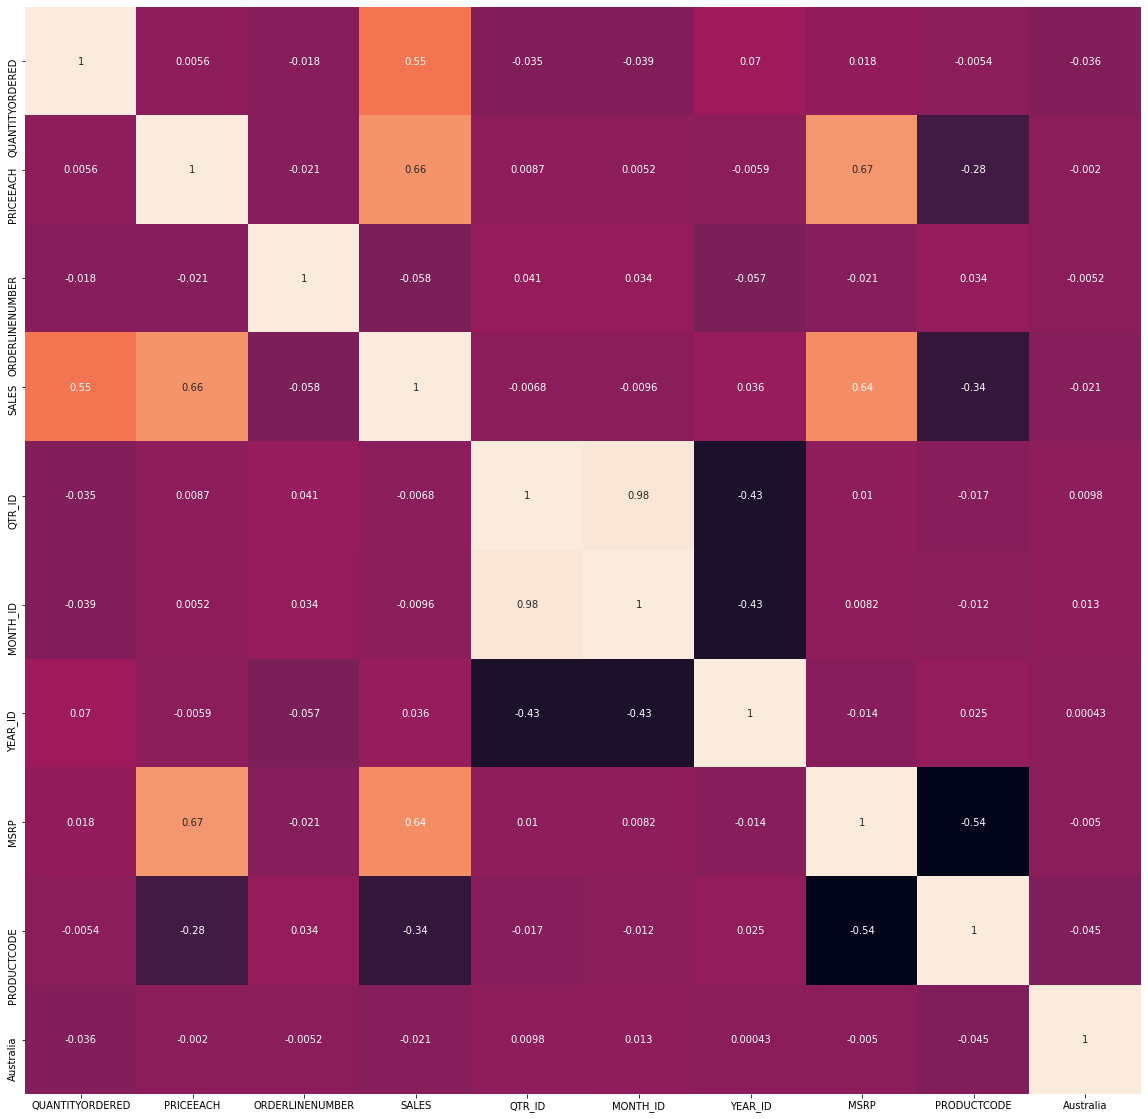

In [134]:
plt.figure(figsize = (20, 20))
corr_matrix = dataset.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot = True, cbar = False)

**We can Clearly see that Quarter ID and the monthly IDs are highly correlated**

**Dropping Any one Column won't make any diffenece !**

In [135]:
dataset.drop("QTR_ID", axis = 1, inplace = True)
dataset.shape

(2823, 37)

#### Plotting Displots

Distplot shows the:

  (1) Histogram: it's a graphical display of data using bars with various heights. Each bar groups numbers into ranges and taller bars show that more data falls in that range.

  (2) Kde Plot: Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable.
  
  (3) Rug plot: plot of data for a single quantitative variable, displayed as marks along an axis (one-dimensional scatter plot). 


In [136]:
import plotly.figure_factory as ff

plt.figure(figsize = (10, 10))

for i in range(8):
  if dataset.columns[i] != 'ORDERLINENUMBER':
    fig = ff.create_distplot([dataset[dataset.columns[i]].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text = dataset.columns[i])
    fig.show()

<Figure size 720x720 with 0 Axes>

#### Visualize the relationship between variables using pairplots


In [138]:
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(dataset,
    dimensions = dataset.columns[:8], color = 'MONTH_ID')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

<Figure size 1080x1080 with 0 Axes>

A trend exists between 'SALES' and 'QUANTITYORDERED'  
A trend exists between 'MSRP' and 'PRICEEACH'  
A trend exists between 'PRICEEACH' and 'SALES'
It seems that sales growth exists as we move from 2013 to 2014 to 2015 ('SALES' vs. 'YEAR_ID')
zoom in into 'SALES' and 'QUANTITYORDERED', you will be able to see the monthly information color coded on the graph

### Applying K-means Algorithm

![alt text](https://drive.google.com/uc?id=12bNt86wOzi8h5kvO30ui-e-36D9oTvQp)

![alt text](https://drive.google.com/uc?id=1Ate7n0b1lY_zNRfubijr7QeOfz-MdufY)

![alt text](https://drive.google.com/uc?id=1Mfd-dqo-toqDwXqEEoIh6QCX2CwPTbLx)

![alt text](https://drive.google.com/uc?id=13nudLLz_G7uQbqvgJlqV3sVmvt1JBoJs)

![alt text](https://drive.google.com/uc?id=1ord3m3hqIZcjPjiHf2zkb_YFL5SqAPp8)

![alt text](https://drive.google.com/uc?id=1M6MGEPTG22ZOXgGbKmuujCmNq3zT3HWO)

![alt text](https://drive.google.com/uc?id=16YDfY_-rsVNEZ2S8mHct-UPPkMwtWd6J)

![alt text](https://drive.google.com/uc?id=1VGfHIIBheXG_p4YmvA1yaGTnXJaW8LsZ)

### Normalizing the Dataset

In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [167]:
dataset_scaled = sc.fit_transform(dataset)

In [168]:
dataset_scaled

array([[-0.52289086,  0.5969775 , -1.05705871, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-0.11220131, -0.11445035, -0.34701507, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [ 0.60650538,  0.54938372, -1.05705871, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       ...,
       [ 0.81185016,  0.81015797, -0.58369628, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       [-0.11220131, -1.06186404, -1.29373992, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [ 1.2225397 , -0.89925195,  0.59970978, ..., -0.24267205,
         1.01967636, -0.9121005 ]])

### Finding Optimal Number of Clusters

In [169]:
from sklearn.cluster import KMeans

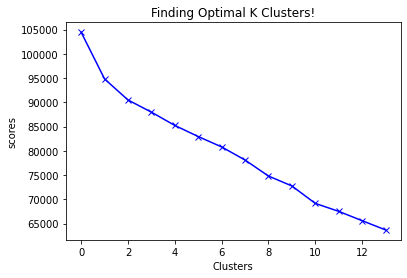

In [170]:
scores = []

for i in range(1, 15):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(dataset_scaled)
  scores.append(kmeans.inertia_)  # intertia is the Sum of squared distances of samples to their closest cluster center (WCSS)

plt.plot(scores, 'bx-')
plt.title("Finding Optimal K Clusters!")
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

**We can see that K=5 is the optimal value**

### Apply KMeans

In [192]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(dataset_scaled)
labels = kmeans.labels_

In [193]:
labels

array([4, 4, 3, ..., 3, 4, 3], dtype=int32)

In [194]:
kmeans.cluster_centers_.shape

(5, 37)

### Lets Visualize the Clusters

In [195]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [dataset.columns])
cluster_centers 

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,1.245428,0.800220,-0.259579,2.573861,-0.088008,0.136857,1.430265,-0.871802,-0.084647,0.043374,-0.108756,-0.118498,0.107642,-0.004181,0.071653,0.023985,0.094193,0.023250,0.005118,0.010166,-0.029737,-0.015199,-0.039435,-0.052984,-0.105371,-0.116045,0.108611,0.580097,0.011712,-0.164278,-0.300637,-0.128350,-0.201008,-0.151285,4.120788,-0.980703,-0.912100
1,-0.238120,-0.111504,0.374193,-0.305340,0.129536,-0.099789,-0.205639,0.209124,-0.264819,-0.140961,-0.108756,-0.159458,-0.151083,-0.183541,-0.353765,-0.149852,-0.075499,4.897173,-0.136988,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,-0.742934,-0.304345,-0.305805,0.592055,-0.095340,0.006298,-0.284337,0.418106,-0.242672,-0.150357,0.262666
2,0.067801,0.648183,0.009081,0.503599,0.029317,-0.034025,0.815901,-0.547118,-0.044801,0.108527,-0.041217,-0.031077,0.045504,0.020884,-0.065153,0.122577,-0.002972,-0.204199,-0.056006,0.068070,0.093574,-0.015619,0.001377,-0.001618,0.364831,0.007372,-0.026399,1.385402,-0.364452,-0.348674,-0.300637,-0.167454,-0.345470,-0.523371,-0.242672,0.914393,-0.806392
3,0.414967,0.527605,-0.048125,0.401703,-0.009238,0.026661,0.113353,0.044690,0.021706,-0.043667,0.016353,0.021357,-0.026940,0.002354,0.035050,-0.066440,-0.026645,-0.204199,-0.000615,-0.018813,-0.045224,0.008218,0.033349,0.047660,-0.105371,0.001523,0.081919,-0.721812,0.224529,0.095685,0.160487,0.027681,0.343739,0.208633,-0.242672,1.019676,-0.912100
4,-0.459356,-0.757804,0.029767,-0.820996,-0.007146,-0.011730,-0.625557,0.318733,0.040546,-0.013389,0.031852,0.029522,-0.003292,0.005608,0.028109,-0.000901,0.013978,-0.204199,0.037850,-0.004229,0.000271,0.018686,0.014701,-0.012224,-0.073144,0.031475,0.007754,-0.194566,0.040071,0.064553,0.076976,0.074817,-0.024455,0.081568,-0.242672,-0.980703,1.096370


In [196]:
cluster_centers = sc.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [dataset.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,4.458599e-02,2.547771e-02,-1.908196e-17,6.369427e-03,3.821656e-02,3.184713e-02,1.337580e-01,2.547771e-02,1.273885e-02,4.458599e-02,1.910828e-02,3.184713e-02,6.369427e-03,2.547771e-02,1.082803e-01,1.273885e-02,4.336809e-17,2.547771e-02,0.407643,6.178344e-01,1.210191e-01,5.732484e-02,-1.110223e-16,6.369427e-03,4.458599e-02,1.528662e-01,1.000000e+00,-7.771561e-16,9.992007e-16
1,32.773585,81.409434,8.047170,2991.593208,7.566038,2003.745283,92.452830,60.377358,1.387779e-17,-3.469447e-17,-1.387779e-17,-3.816392e-17,1.387779e-17,6.938894e-18,9.714451e-17,4.857226e-17,1.040834e-17,1.000000e+00,3.122502e-17,7.632783e-17,-1.040834e-17,2.428613e-17,-2.081668e-16,-2.081668e-17,2.255141e-17,-5.551115e-17,0.000000,1.981132e-01,1.886792e-02,2.924528e-01,5.660377e-02,2.830189e-02,1.886792e-02,3.867925e-01,-7.632783e-17,4.150943e-01,5.849057e-01
2,35.753176,96.732849,6.504537,4481.285481,7.199637,2003.791289,133.499093,36.495463,5.444646e-02,3.448276e-02,7.259528e-03,1.996370e-02,2.903811e-02,3.629764e-02,9.074410e-02,3.992740e-02,5.444646e-03,3.053113e-16,1.088929e-02,4.174229e-02,1.814882e-02,2.540835e-02,1.215971e-01,1.996370e-02,4.900181e-02,5.263158e-02,0.343013,1.000000e+00,-1.443290e-15,6.938894e-16,1.068590e-15,1.561251e-16,-8.187895e-16,-2.636780e-15,5.898060e-16,9.473684e-01,5.263158e-02
3,39.134474,94.300709,6.262836,4293.640611,7.058680,2003.833741,105.270171,55.184597,7.090465e-02,1.344743e-02,1.344743e-02,2.811736e-02,1.833741e-02,3.300733e-02,1.222494e-01,1.222494e-02,3.667482e-03,-1.387779e-16,1.833741e-02,2.689487e-02,4.889976e-03,2.933985e-02,1.320293e-01,2.689487e-02,3.642919e-17,5.134474e-02,0.394866,5.051515e-15,1.894866e-01,1.381418e-01,1.271394e-01,3.178484e-02,2.127139e-01,3.007335e-01,8.257284e-16,1.000000e+00,-2.442491e-15
4,30.618808,68.373098,6.591940,2041.993610,7.066331,2003.806885,75.580185,63.838791,7.556675e-02,1.763224e-02,1.511335e-02,2.938707e-02,2.183039e-02,3.358522e-02,1.200672e-01,2.183039e-02,6.717045e-03,-6.730727e-16,2.350966e-02,2.938707e-02,9.235936e-03,3.106633e-02,1.259446e-01,1.847187e-02,3.358522e-03,5.793451e-02,0.359362,2.502099e-01,1.301427e-01,1.284635e-01,1.041142e-01,3.946264e-02,9.907641e-02,2.485306e-01,2.289835e-16,-1.054712e-15,1.000000e+00


In [197]:
labels.shape

(2823,)

In [198]:
labels.max()

4

In [199]:
labels.min()

0

In [200]:
dataset_cluster = pd.concat([dataset, pd.DataFrame({'Clusters': labels})], axis = 1)

In [201]:
dataset_cluster.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,Clusters
0,30,95.70,2,2871.00,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,4
1,34,81.35,5,2765.90,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,4
2,41,94.74,2,3884.34,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,3
3,45,83.26,6,3746.70,8,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,3
4,49,100.00,14,5205.27,10,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,3


In [204]:
dataset['ORDERLINENUMBER'] = dataset['ORDERLINENUMBER'].apply(lambda x: float(x))

In [206]:
dataset.head(0)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small


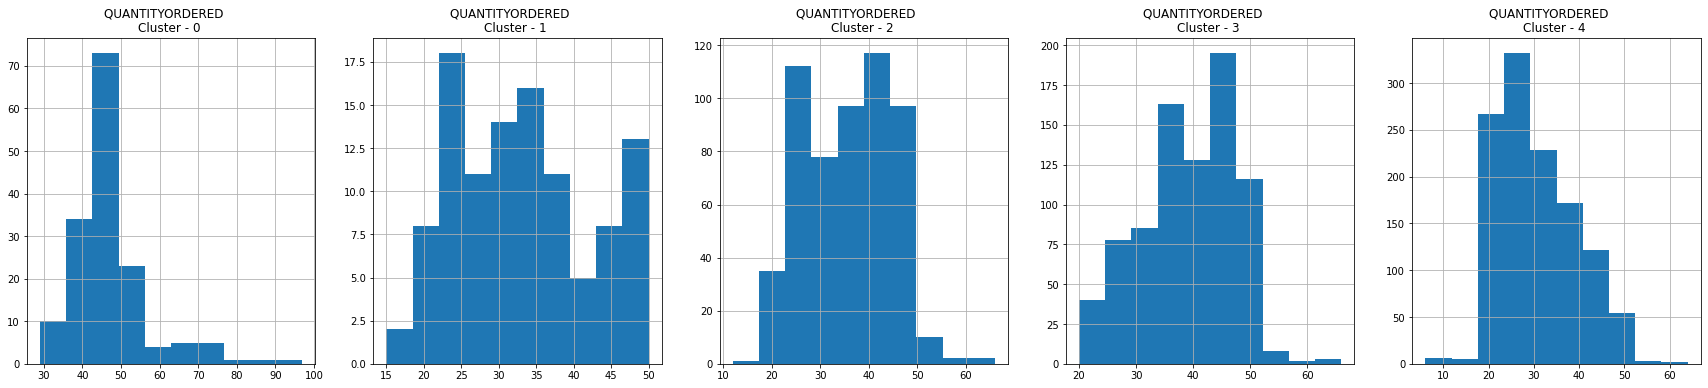

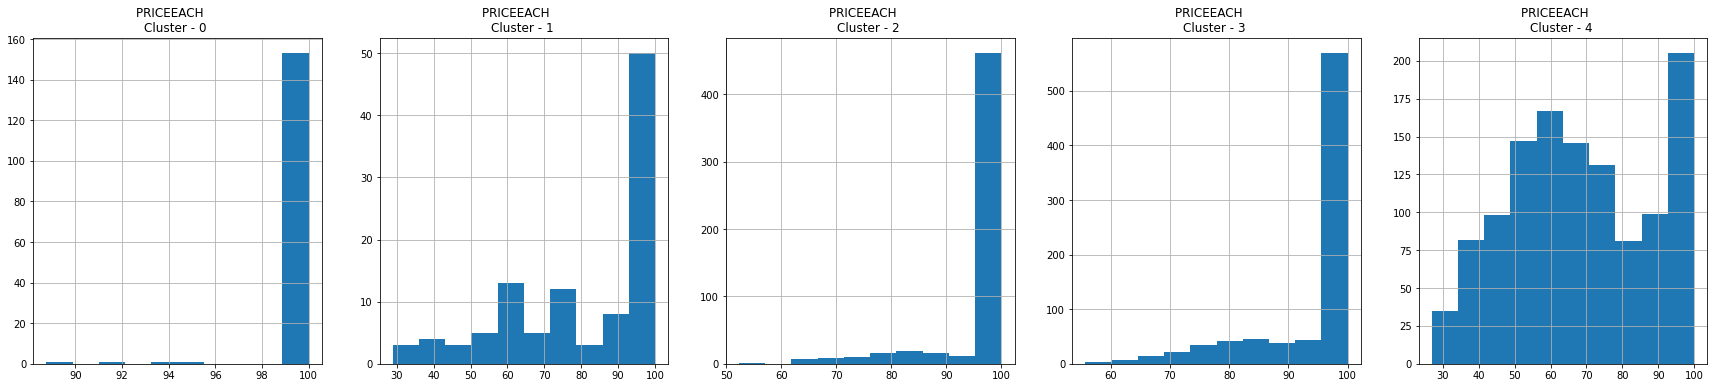

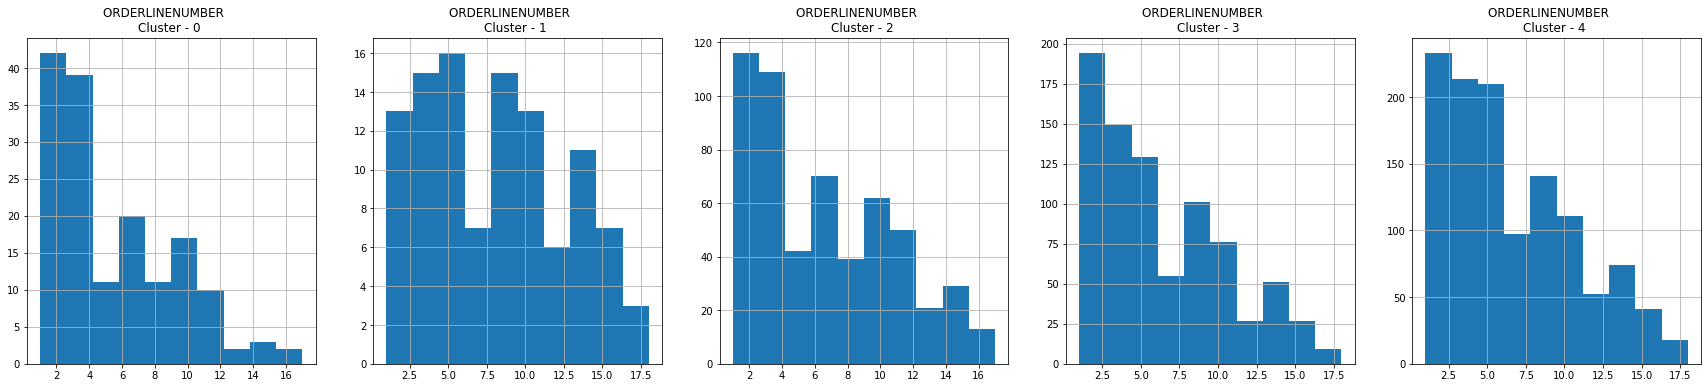

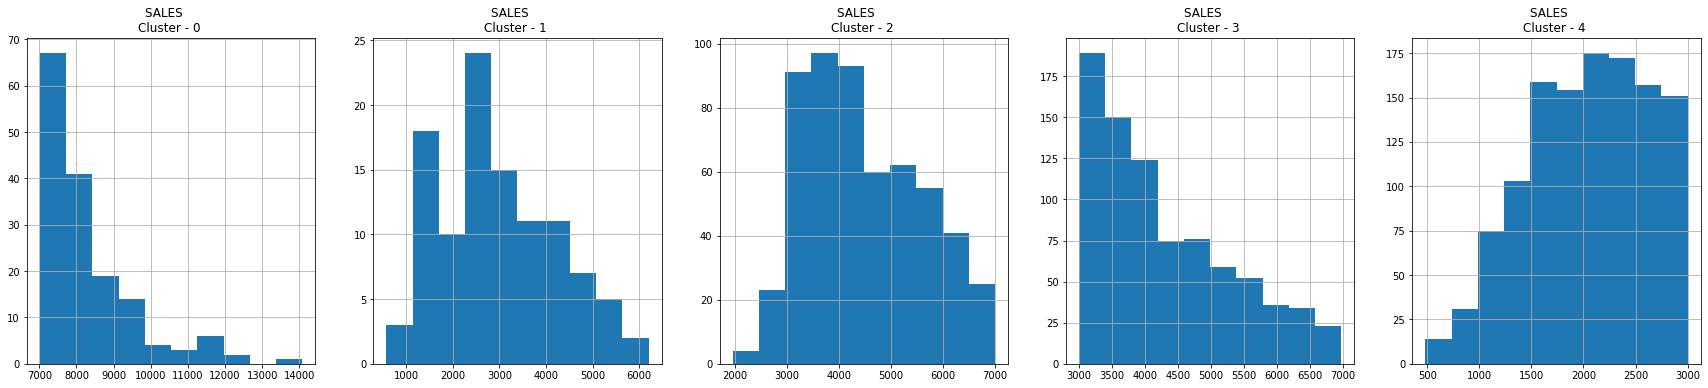

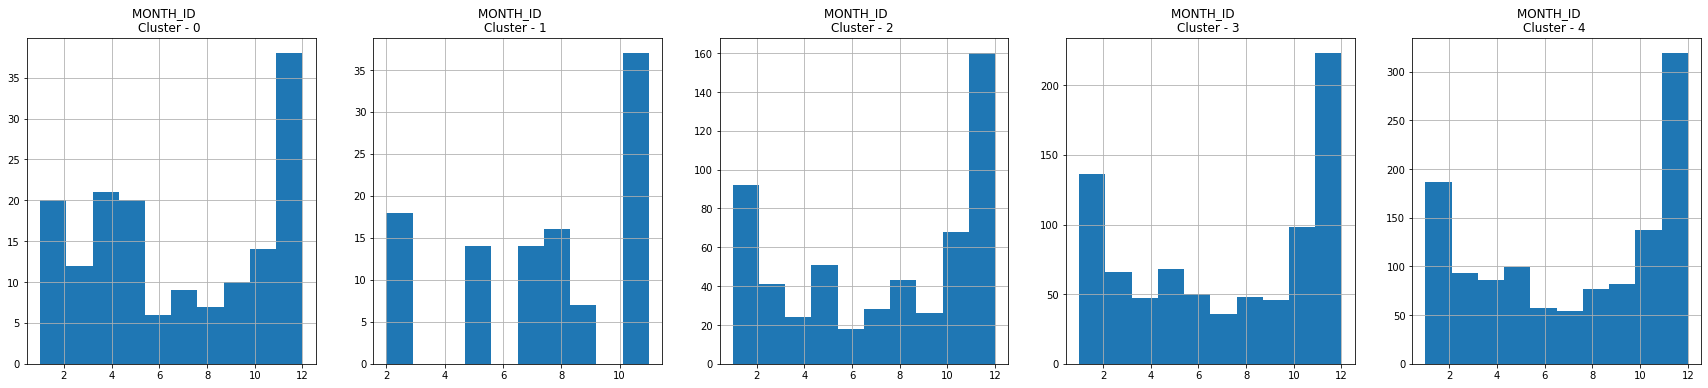

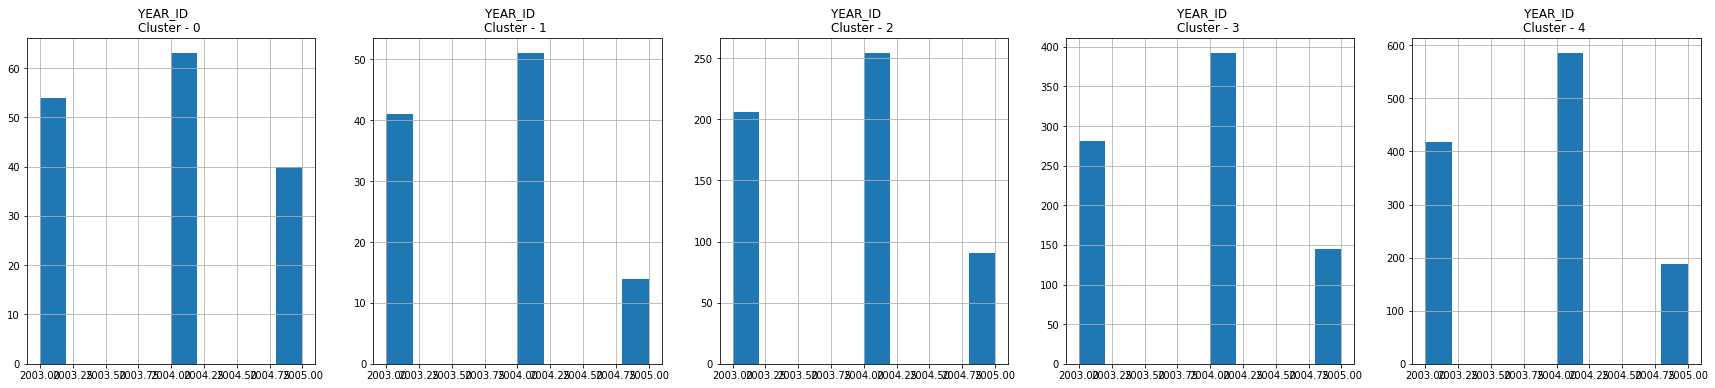

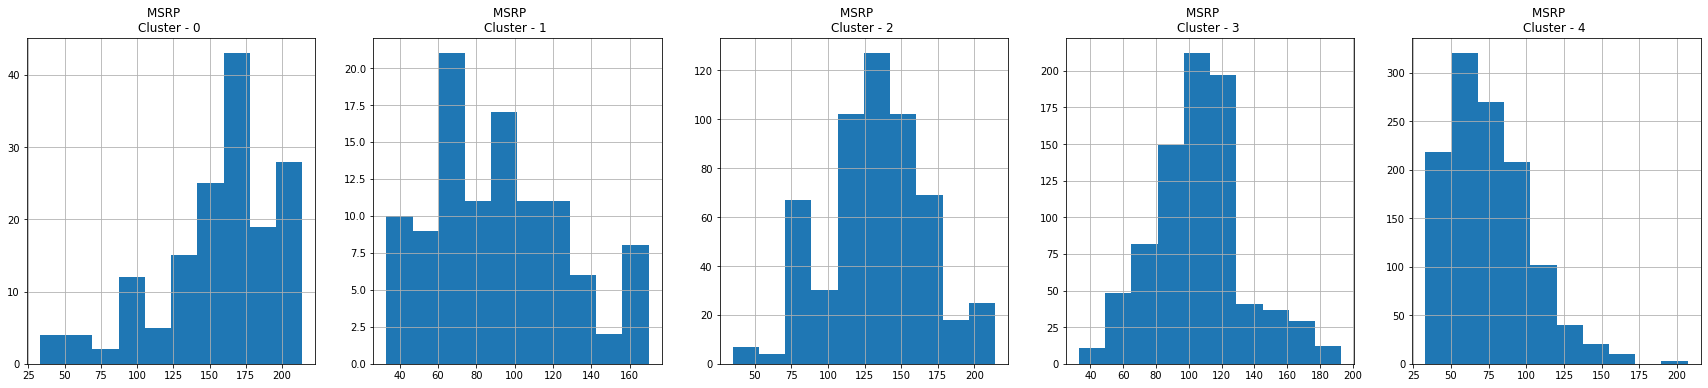

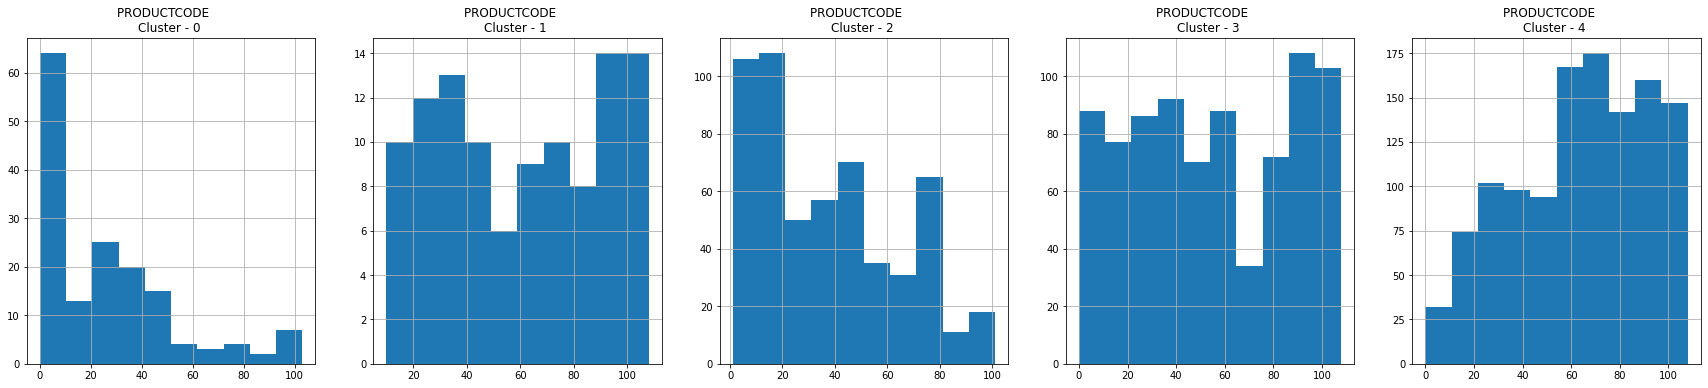

In [212]:
for i in dataset.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = dataset_cluster[dataset_cluster['Clusters'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))

plt.show()

### Applying PCA

![alt text](https://drive.google.com/uc?id=1DuqbJRlxzbm37fPD3ZKxLGzQ2PbstZt8)

In [223]:
from sklearn.decomposition import PCA

In [224]:
pca = PCA(n_components=0.95)
pca.fit(dataset_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [227]:
reduced = pca.transform(dataset_scaled)
reduced

array([[-0.48631933, -1.19523199,  1.00267727, ..., -0.46933861,
         0.73633053, -0.02786422],
       [-0.78465471, -1.03283188,  1.4162651 , ...,  0.47667272,
         0.51482005,  0.24039136],
       [ 1.43146434,  0.12199648,  0.28129104, ...,  0.78409057,
         0.34777239,  0.42929152],
       ...,
       [ 0.38985361,  4.12946409, -0.06056817, ..., -0.81725125,
        -0.54866929, -0.89956391],
       [-2.78886764,  2.38601395,  1.54986594, ..., -0.08474183,
        -1.32604687, -1.52185734],
       [-0.7054888 ,  3.31242744, -0.51890644, ..., -1.0359746 ,
        -1.42439413, -0.23450857]])

In [232]:
reduced[0]

array([-0.48631933, -1.19523199,  1.00267727,  2.02777804, -1.38805838,
       -1.5382535 ,  0.01045677,  0.3757592 ,  0.73205726,  0.60850138,
        0.03006687,  0.66426327, -0.10584303, -0.70294414, -0.01224581,
        0.20257845, -0.09834708,  0.06953653,  0.13616925,  0.27712373,
       -0.62167061, -0.12091989,  0.57791433,  0.58539773,  0.49250886,
       -0.96499577, -0.46933861,  0.73633053, -0.02786422])

In [228]:
pca.explained_variance_

array([4.09520383, 1.76252438, 1.62872145, 1.5111616 , 1.40951349,
       1.35990618, 1.31950228, 1.27528899, 1.22812129, 1.19933776,
       1.11156064, 1.10056342, 1.06426408, 1.05398034, 1.03951757,
       1.03658938, 1.02902835, 1.02625229, 1.01888333, 1.01500023,
       1.00520361, 0.98730973, 0.95291705, 0.93065531, 0.89720341,
       0.89608845, 0.87200079, 0.82120519, 0.80845128])

In [229]:
pca.explained_variance_ratio_

array([0.11064198, 0.04761892, 0.04400391, 0.04082774, 0.03808146,
       0.0367412 , 0.03564959, 0.03445506, 0.03318071, 0.03240305,
       0.03003154, 0.02973442, 0.0287537 , 0.02847586, 0.02808512,
       0.02800601, 0.02780173, 0.02772672, 0.02752763, 0.02742272,
       0.02715804, 0.02667459, 0.02574539, 0.02514394, 0.02424015,
       0.02421003, 0.02355924, 0.02218687, 0.02184229])

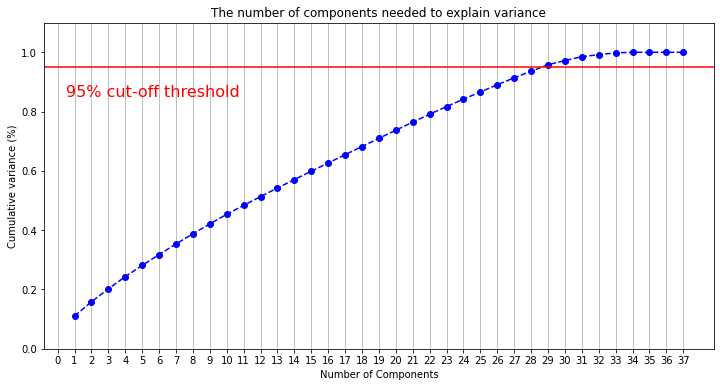

In [233]:
pca = PCA().fit(dataset_scaled)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 38, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 38, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

### Applying PCA with 29 Components

In [235]:
pca = PCA(n_components = 29)
principal_comp = pca.fit_transform(dataset_scaled)
principal_comp

array([[-0.48631933, -1.19523199,  1.00267727, ..., -0.46933861,
         0.73633053, -0.02786422],
       [-0.78465471, -1.03283188,  1.4162651 , ...,  0.47667272,
         0.51482005,  0.24039136],
       [ 1.43146434,  0.12199648,  0.28129104, ...,  0.78409057,
         0.34777239,  0.42929152],
       ...,
       [ 0.38985361,  4.12946409, -0.06056817, ..., -0.81725125,
        -0.54866929, -0.89956391],
       [-2.78886764,  2.38601395,  1.54986594, ..., -0.08474183,
        -1.32604687, -1.52185734],
       [-0.7054888 ,  3.31242744, -0.51890644, ..., -1.0359746 ,
        -1.42439413, -0.23450857]])

In [236]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca2', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8',
                                                        'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca4', 'pca15', 'pca16',
                                                        'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24',
                                                        'pca25', 'pca26', 'pca27', 'pca27','pca29'])

pca_df.head()

,pca1,pca2,pca2,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca4,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca27,pca29
0,-0.486319,-1.195232,1.002677,2.027778,-1.388058,-1.538253,0.010457,0.375759,0.732057,0.608501,0.030067,0.664263,-0.105843,-0.702944,-0.012246,0.202578,-0.098347,0.069537,0.136169,0.277124,-0.621671,-0.120920,0.577914,0.585398,0.492509,-0.964996,-0.469339,0.736331,-0.027864
1,-0.784655,-1.032832,1.416265,0.935744,-1.387748,-0.721294,1.212932,2.314167,2.220862,-0.102428,0.578193,-0.714908,-0.988519,0.006567,0.132966,-0.195130,-0.031759,-0.099747,0.114988,0.074373,-0.488495,0.037805,0.376700,0.242122,0.126071,-0.269671,0.476673,0.514820,0.240391
2,1.431464,0.121996,0.281291,1.198287,-1.624130,-0.593986,1.308884,2.197486,2.528763,-0.726657,0.392353,-0.373613,-0.930932,0.541010,0.136694,-0.105083,0.022431,-0.163862,0.109580,-0.054185,-0.267571,-0.215182,0.285148,0.403191,-0.251529,-0.811959,0.784091,0.347772,0.429292
3,1.288425,-0.218280,-0.579360,2.469849,-0.774337,-1.402843,0.330828,0.320712,0.977633,-0.794904,-0.027100,0.261016,0.123375,-0.394971,0.051049,0.106736,0.133833,0.141632,0.008147,0.025755,-0.253925,-0.096519,0.997892,0.744396,0.274274,-0.514570,-0.071986,0.400991,1.180261
4,1.976022,-0.141698,-1.061314,2.379492,-0.259097,-1.428885,0.757063,0.223249,0.872033,-0.956663,0.411133,-0.375322,0.146035,-0.916167,0.120654,-0.147820,0.250044,0.207178,-0.081890,-0.037034,-0.377018,0.298039,1.528579,0.702570,0.577146,0.714019,-0.284708,0.543250,1.516236


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)


In [238]:
pca_df.head()

,pca1,pca2,pca2,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca4,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca27,pca29,cluster
0,-0.486319,-1.195232,1.002677,2.027778,-1.388058,-1.538253,0.010457,0.375759,0.732057,0.608501,0.030067,0.664263,-0.105843,-0.702944,-0.012246,0.202578,-0.098347,0.069537,0.136169,0.277124,-0.621671,-0.120920,0.577914,0.585398,0.492509,-0.964996,-0.469339,0.736331,-0.027864,4
1,-0.784655,-1.032832,1.416265,0.935744,-1.387748,-0.721294,1.212932,2.314167,2.220862,-0.102428,0.578193,-0.714908,-0.988519,0.006567,0.132966,-0.195130,-0.031759,-0.099747,0.114988,0.074373,-0.488495,0.037805,0.376700,0.242122,0.126071,-0.269671,0.476673,0.514820,0.240391,4
2,1.431464,0.121996,0.281291,1.198287,-1.624130,-0.593986,1.308884,2.197486,2.528763,-0.726657,0.392353,-0.373613,-0.930932,0.541010,0.136694,-0.105083,0.022431,-0.163862,0.109580,-0.054185,-0.267571,-0.215182,0.285148,0.403191,-0.251529,-0.811959,0.784091,0.347772,0.429292,3
3,1.288425,-0.218280,-0.579360,2.469849,-0.774337,-1.402843,0.330828,0.320712,0.977633,-0.794904,-0.027100,0.261016,0.123375,-0.394971,0.051049,0.106736,0.133833,0.141632,0.008147,0.025755,-0.253925,-0.096519,0.997892,0.744396,0.274274,-0.514570,-0.071986,0.400991,1.180261,3
4,1.976022,-0.141698,-1.061314,2.379492,-0.259097,-1.428885,0.757063,0.223249,0.872033,-0.956663,0.411133,-0.375322,0.146035,-0.916167,0.120654,-0.147820,0.250044,0.207178,-0.081890,-0.037034,-0.377018,0.298039,1.528579,0.702570,0.577146,0.714019,-0.284708,0.543250,1.516236,3


In [241]:
pca.explained_variance_ratio_ * 100

array([11.06419777,  4.76189199,  4.40039056,  4.08277378,  3.80814647,
        3.67412015,  3.5649591 ,  3.44550605,  3.31807095,  3.24030516,
        3.00315374,  2.97344206,  2.87537049,  2.84758646,  2.80851173,
        2.8006005 ,  2.78017251,  2.77267232,  2.75276326,  2.74227212,
        2.71580415,  2.66745945,  2.57453917,  2.51439361,  2.42401511,
        2.42100276,  2.35592406,  2.21868727,  2.18422947])

### Applying Auto Encoders

In [242]:
dataset.shape

(2823, 37)

### Building Architecture

In [243]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input

In [245]:
input_shape = Input(shape = (37,))

x = Dense(units = 50, activation = 'relu', kernel_initializer = 'glorot_uniform')(input_shape)
x = Dense(units = 500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(units = 2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(37, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_shape, decoded)

# encoder - used for dimensionality reduction
encoder = Model(input_shape, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

In [246]:
autoencoder.fit(dataset, dataset, batch_size = 128, epochs = 500, verbose = 2)

Epoch 1/500
23/23 - 1s - loss: 117806.3984
Epoch 2/500
23/23 - 1s - loss: 20042.5703
Epoch 3/500
23/23 - 1s - loss: 2344.0876
Epoch 4/500
23/23 - 1s - loss: 202.0490
Epoch 5/500
23/23 - 1s - loss: 114.9275
Epoch 6/500
23/23 - 1s - loss: 75.3326
Epoch 7/500
23/23 - 1s - loss: 78.3073
Epoch 8/500
23/23 - 1s - loss: 68.3277
Epoch 9/500
23/23 - 1s - loss: 68.0359
Epoch 10/500
23/23 - 1s - loss: 66.2291
Epoch 11/500
23/23 - 1s - loss: 68.5559
Epoch 12/500
23/23 - 1s - loss: 66.7197
Epoch 13/500
23/23 - 1s - loss: 64.4676
Epoch 14/500
23/23 - 1s - loss: 73.9034
Epoch 15/500
23/23 - 1s - loss: 69.9104
Epoch 16/500
23/23 - 1s - loss: 65.5622
Epoch 17/500
23/23 - 1s - loss: 63.2275
Epoch 18/500
23/23 - 1s - loss: 69.7713
Epoch 19/500
23/23 - 1s - loss: 65.5911
Epoch 20/500
23/23 - 1s - loss: 66.7095
Epoch 21/500
23/23 - 1s - loss: 62.1725
Epoch 22/500
23/23 - 1s - loss: 63.9361
Epoch 23/500
23/23 - 1s - loss: 77.1808
Epoch 24/500
23/23 - 1s - loss: 67.7327
Epoch 25/500
23/23 - 1s - loss: 86.868

In [247]:
autoencoder.save('autoencoder_1.h5')

In [248]:
pred = encoder.predict(dataset_scaled)

In [249]:
pred

array([[0.40093035, 0.86478317, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.7488004 , 0.93250155, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.7852514 , 0.8494035 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.3839459 , 1.4546977 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.7562578 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13869599, 1.7355744 , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

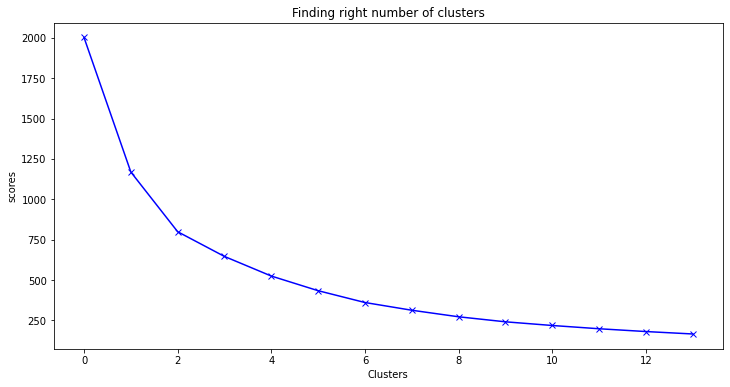

In [250]:
scores = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [255]:
kmeans = KMeans(3, random_state = 0)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(dataset_scaled)

In [256]:
y_kmeans

array([2, 2, 1, ..., 0, 0, 0], dtype=int32)

In [257]:
df_cluster_dr = pd.concat([dataset, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2.0,2871.00,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
1,34,81.35,5.0,2765.90,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
2,41,94.74,2.0,3884.34,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2
3,45,83.26,6.0,3746.70,8,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,2
4,49,100.00,14.0,5205.27,10,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,2


In [259]:
import joblib

In [260]:
joblib.dump(sc, 'scaler.sav')

['scaler.sav']

In [270]:
dataset['ORDERLINENUMBER']

0        2.0
1        5.0
2        2.0
3        6.0
4       14.0
        ... 
2818    15.0
2819     1.0
2820     4.0
2821     1.0
2822     9.0
Name: ORDERLINENUMBER, Length: 2823, dtype: float64